In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("machinefale.csv", usecols=[2,3,4,5,6,7,8])
df

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure
0,M,298.1,308.6,1551,42.8,0,0
1,L,298.2,308.7,1408,46.3,3,0
2,L,298.1,308.5,1498,49.4,5,0
3,L,298.2,308.6,1433,39.5,7,0
4,L,298.2,308.7,1408,40.0,9,0
...,...,...,...,...,...,...,...
9986,M,298.8,308.4,1604,29.5,14,0
9987,H,298.9,308.4,1632,31.8,17,0
9988,M,299.0,308.6,1645,33.4,22,0
9989,H,299.0,308.7,1408,48.5,25,0


In [34]:
df.isna().sum()

Type                       0
Air temperature [K]        0
Process temperature [K]    0
Rotational speed [rpm]     0
Torque [Nm]                0
Tool wear [min]            0
Machine failure            0
dtype: int64

In [35]:
df = df.reindex(columns=['Machine failure', 'Type', 'Air temperature [K]', 'Process temperature [K]',
                  'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]'])
df

,Machine failure,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min]
0,0,M,298.1,308.6,1551,42.8,0
1,0,L,298.2,308.7,1408,46.3,3
2,0,L,298.1,308.5,1498,49.4,5
3,0,L,298.2,308.6,1433,39.5,7
4,0,L,298.2,308.7,1408,40.0,9
...,...,...,...,...,...,...,...
9986,0,M,298.8,308.4,1604,29.5,14
9987,0,H,298.9,308.4,1632,31.8,17
9988,0,M,299.0,308.6,1645,33.4,22
9989,0,H,299.0,308.7,1408,48.5,25


In [36]:
# Type列をOne-hot-Encoding
df = pd.get_dummies(df,drop_first=True)
df

,Machine failure,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Type_L,Type_M
0,0,298.1,308.6,1551,42.8,0,0,1
1,0,298.2,308.7,1408,46.3,3,1,0
2,0,298.1,308.5,1498,49.4,5,1,0
3,0,298.2,308.6,1433,39.5,7,1,0
4,0,298.2,308.7,1408,40.0,9,1,0
...,...,...,...,...,...,...,...,...
9986,0,298.8,308.4,1604,29.5,14,0,1
9987,0,298.9,308.4,1632,31.8,17,0,0
9988,0,299.0,308.6,1645,33.4,22,0,1
9989,0,299.0,308.7,1408,48.5,25,0,0


In [37]:
df.describe()

,Machine failure,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Type_L,Type_M
count,9991.000000,9991.000000,9991.000000,9991.000000,9991.000000,9991.000000,9991.000000,9991.000000
mean,0.031829,300.004634,310.005385,1538.840957,39.985377,107.942648,0.600140,0.299570
std,0.175552,2.000300,1.483990,179.287369,9.969029,63.656648,0.489894,0.458092
min,0.000000,295.300000,305.700000,1168.000000,3.800000,0.000000,0.000000,0.000000
25%,0.000000,298.300000,308.800000,1423.000000,33.200000,53.000000,0.000000,0.000000
50%,0.000000,300.100000,310.100000,1503.000000,40.100000,108.000000,1.000000,0.000000
75%,0.000000,301.500000,311.100000,1612.000000,46.700000,162.000000,1.000000,1.000000
max,1.000000,304.500000,313.800000,2886.000000,76.600000,253.000000,1.000000,1.000000


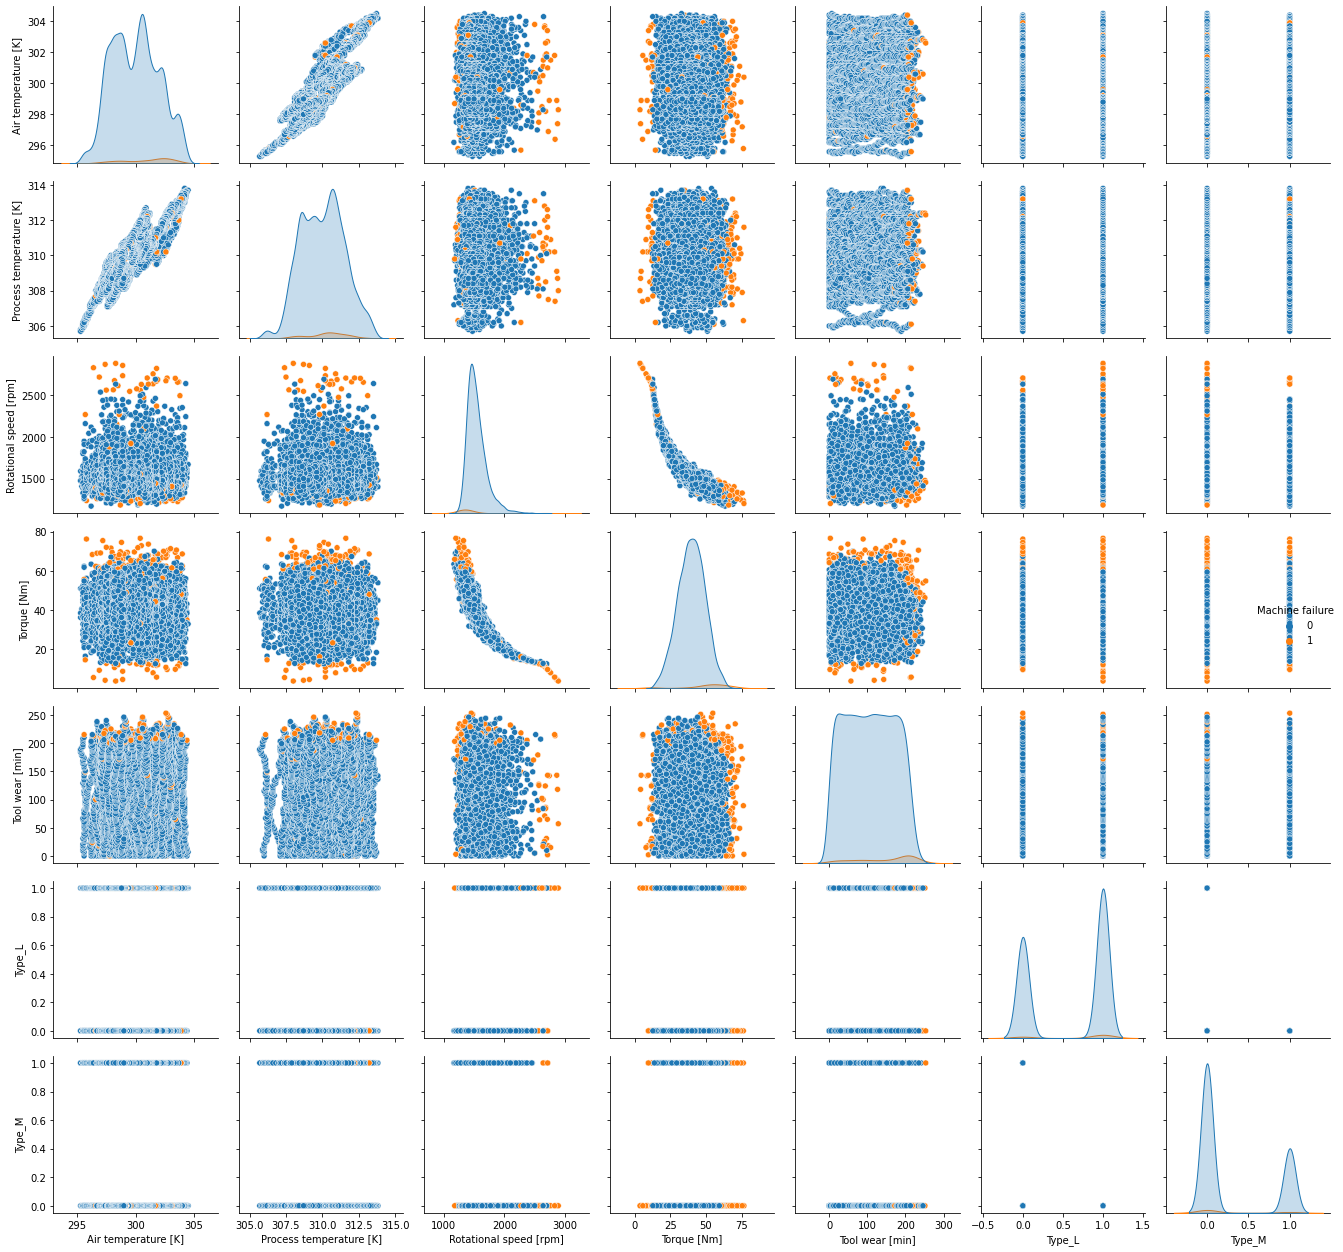

In [38]:
# ヒストグラム、散布図一括表示
sns.pairplot(df,hue="Machine failure")
plt.tight_layout()
plt.show()

In [39]:
# 正規分布の列に標準化を適用
from sklearn import preprocessing
df['Air temperature [K]']=preprocessing.scale(df['Air temperature [K]'])
df['Process temperature [K]']=preprocessing.scale(df['Process temperature [K]'])
df['Rotational speed [rpm]']=preprocessing.scale(df['Rotational speed [rpm]'])
df['Torque [Nm]']=preprocessing.scale(df['Torque [Nm]'])

# Tool wear [min]列をmin-maxで正規化
df["Tool wear [min]"] = (df["Tool wear [min]"] - df["Tool wear [min]"].min()) / (df["Tool wear [min]"].max() - df["Tool wear [min]"].min())
df

,Machine failure,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Type_L,Type_M
0,0,-0.952222,-0.947078,0.067822,0.282351,0.000000,0,1
1,0,-0.902227,-0.879689,-0.729820,0.633456,0.011858,1,0
2,0,-0.952222,-1.014468,-0.227807,0.944434,0.019763,1,0
3,0,-0.902227,-0.947078,-0.590372,-0.048691,0.027668,1,0
4,0,-0.902227,-0.879689,-0.729820,0.001467,0.035573,1,0
...,...,...,...,...,...,...,...,...
9986,0,-0.602257,-1.081857,0.363452,-1.051848,0.055336,0,1
9987,0,-0.552262,-1.081857,0.519633,-0.821122,0.067194,0,0
9988,0,-0.502267,-0.947078,0.592146,-0.660617,0.086957,0,1
9989,0,-0.502267,-0.879689,-0.729820,0.854150,0.098814,0,0


## 機械学習を実行しよう

In [40]:
# 正常値のみの学習データ、正常値、異常値を合わせたテストデータを用意
# 正常値のトレーニングデータ、テストデータ
normal = df[df["Machine failure"] != 1]
x_normal = normal.iloc[:,1:]
y_normal = normal.iloc[:,0]

p = 300
x_test_normal = x_normal.iloc[:p, :]
y_test_normal = y_normal.iloc[:p]
x_train_normal = x_normal.iloc[p:, :]

# 異常値のテストデータ
outliers = df[df["Machine failure"] != 0]
x_test_outliers = outliers.iloc[:,1:]
y_outliers = outliers.iloc[:,0]

# 正常値、異常値を合わせたテストデータ
x_test = pd.concat([x_test_normal, x_test_outliers])

# テストデータのラベルリスト
y_test = pd.concat([y_test_normal, y_outliers])


In [41]:
from sklearn import svm
from sklearn.svm import OneClassSVM
# fit the model
clf = OneClassSVM(nu=0.01, kernel='linear', gamma=0.1)
# kernel種類：'linear'、 'poly'、 'rbf'、 'sigmoid'
clf.fit(x_train_normal)

y_pred = clf.predict(x_test)


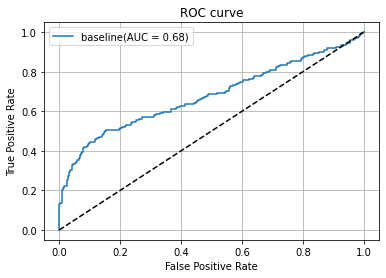

In [42]:
from sklearn import svm
y_score = clf.decision_function(x_test)
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_test,y_score)

from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, y_score)

plt.plot(fpr, tpr, label='baseline(AUC = %.2f)'%auc)
plt.plot([0,1],[0,1],'k--')
plt.legend()
plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid(True)
plt.show()
